In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_an_temp_reg2_daily_2021.nc'
temp = xr.open_mfdataset(datafile).compute()
temp = temp.var130
temp

<xarray.DataArray 'var130' (time: 365, plev: 37, lat: 91, lon: 180)> Size: 885MB
array([[[[264.1321 , 264.1321 , 264.1321 , ..., 264.1321 , 264.1321 ,
          264.1321 ],
         [266.73904, 266.77078, 266.7947 , ..., 266.5994 , 266.6536 ,
          266.70047],
         [271.13065, 271.17215, 271.19705, ..., 270.90506, 270.99588,
          271.07156],
         ...,
         [285.77713, 285.74393, 285.71365, ..., 285.8914 , 285.85135,
          285.81326],
         [286.0032 , 285.98416, 285.9656 , ..., 286.06326, 286.04227,
          286.02225],
         [286.74344, 286.74344, 286.74344, ..., 286.74344, 286.74344,
          286.74344]],

        [[258.1566 , 258.1566 , 258.1566 , ..., 258.1566 , 258.1566 ,
          258.1566 ],
         [258.27377, 258.41537, 258.55405, ..., 257.82895, 257.9808 ,
          258.12973],
         [261.8939 , 262.25278, 262.6043 , ..., 260.7811 , 261.1566 ,
          261.52768],
...
         [267.0744 , 266.97235, 266.85907, ..., 267.2907 , 267.2331 ,
          267.16083],
         [267.23553, 267.20575, 267.17157, ..., 267.30194, 267.28436,
          267.2624 ],
         [266.278  , 266.278  , 266.278  , ..., 266.278  , 266.278  ,
          266.278  ]],

        [[249.42935, 249.42935, 249.42935, ..., 249.42935, 249.42935,
          249.42935],
         [250.52505, 250.4816 , 250.44302, ..., 250.67154, 250.6193 ,
          250.57095],
         [251.43277, 251.39029, 251.34097, ..., 251.52945, 251.50162,
          251.46988],
         ...,
         [268.3439 , 268.2438 , 268.1315 , ..., 268.56314, 268.50455,
          268.4318 ],
         [268.56216, 268.52994, 268.49527, ..., 268.631  , 268.61295,
          268.5895 ],
         [267.52652, 267.52652, 267.52652, ..., 267.52652, 267.52652,
          267.52652]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 728B 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * plev     (plev) float64 296B 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
  * time     (time) datetime64[ns] 3kB 2021-01-01T09:00:00 ... 2021-12-31T09:...
Attributes:
    table:         128
    cell_methods:  time: mean

In [4]:
# Albany near-surface temperature
temp_A = temp.sel(lat=42,lon=286,plev=100000)
# Pittsburgh near-surface temperature
temp_P = temp.sel(lat=40,lon=280,plev=100000)
# Buenos Aires near-surface temperature
temp_BA = temp.sel(lat=-34,lon=302,plev=100000)

## Scatterplot
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

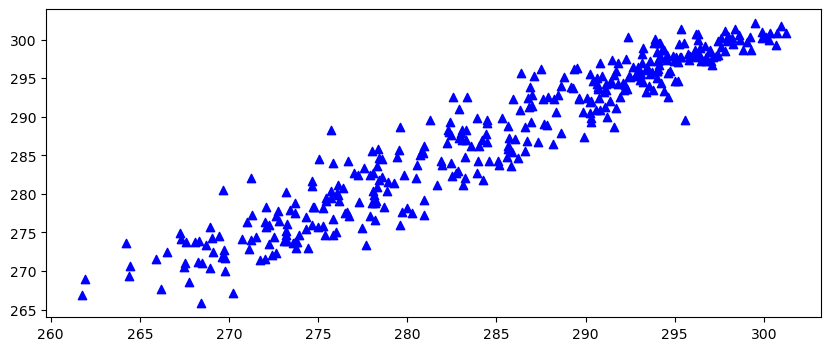

In [5]:
figure = plt.figure(figsize=(10,4))
plt.scatter(temp_A, temp_P, marker='^', c='b')

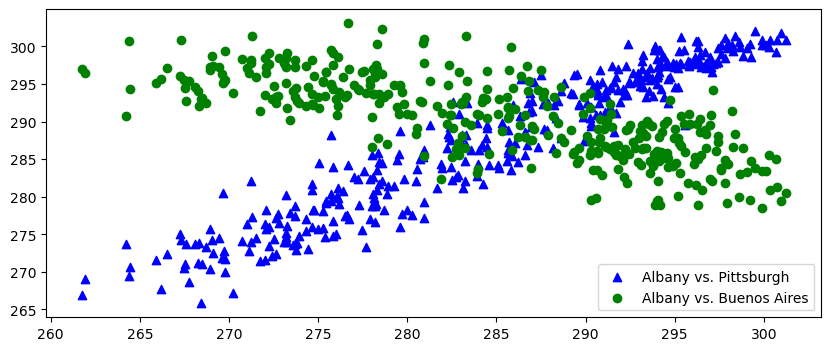

In [6]:
# Add another pair of data
figure = plt.figure(figsize=(10,4))
plt.scatter(temp_A, temp_P, marker='^', c='b', label='Albany vs. Pittsburgh')
plt.scatter(temp_A, temp_BA, marker='o', c='g', label='Albany vs. Buenos Aires')
plt.legend()

## Calculate the Pearson Correlation Coefficient
### https://realpython.com/numpy-scipy-pandas-correlation-python/#example-pandas-correlation-calculation

In [7]:
r_ap = np.corrcoef(temp_A, temp_P)
print(r_ap)
r_ap, p_ap = stats.pearsonr(temp_A, temp_P)
print(r_ap,p_ap)

r_aba = np.corrcoef(temp_A, temp_BA)
print(r_aba)
r_aba, p_aba = stats.pearsonr(temp_A, temp_BA)
print(r_aba,p_aba)

[[1.        0.9573312]
 [0.9573312 1.       ]]
0.9573312731804435 0.0
[[ 1.         -0.75793378]
 [-0.75793378  1.        ]]
-0.7579338438373782 0.0


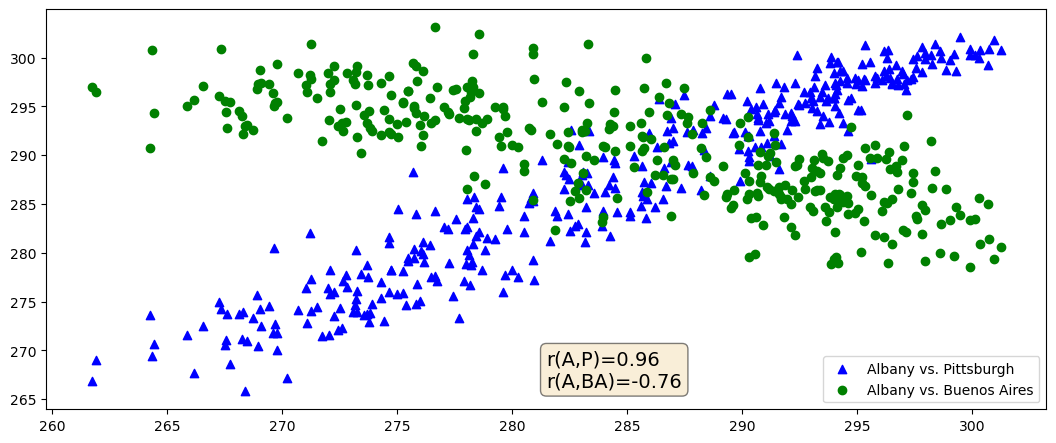

In [8]:
# Add the correlation coefficient to the scatterplot
figure = plt.figure(figsize=(10,4))
ax = figure.add_axes([0, 0, 1, 1])

plt.scatter(temp_A, temp_P, marker='^', c='b', label='Albany vs. Pittsburgh')
plt.scatter(temp_A, temp_BA, marker='o', c='g', label='Albany vs. Buenos Aires')
plt.legend()

#textstr = 'r = '+f"{rxy:.2f}"
textstr = '\n'.join((
    'r(A,P)=%.2f' % (r_ap, ),
    'r(A,BA)=%.2f' % (r_aba, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.50, 0.15, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()